In [1]:
import pandas as pd
import datetime as dt
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Omezení: 
•	Novější než 1.1.2011 (podmínka DateOfIssue >= '2011-01-01' )
•	Rozdíl +-100 dní (zjistila jsem, že nejlepší interval je -30 a +100 – uhrazeno max. 30 dnů před splatností a max. 100 dnů po splatnosti)
•	Odstranit testovací účty (podmínky email neobsahuj ‚csw‘, ‚solitea‘ a ‚test‘ a název firmy neobsahuje ‚test‘)
•	Neaktivní: 
•	Vystavili méně než 3 faktur (podmínka – počet faktur, které vystavila agenda je >= 3)
•	Poslední vystavená fa není starší než 0,5 půl roku (zatím jsem neřešila)
•	Jak jsou kvalitní data u manuálního zadávání úhrady? (lze zjistit podle sloupce Parovani)
•	Podmínky, že datum platby a splatnosti > '2000-01-01' a vyřazení faktur, které vznikly při zrušeném předplatném


jsou tam tyto sloupce:
•	ID_agendy
•	ID_faktury
•	PostalCode = PSČ
•	CountryId = země
•	Nace_Kod = kód NACE zadaný v iDokladu
•	Nace_name = název NACE
•	Datum_Vystavení
•	Datum_Splatnosti
•	Datum_Úhrady
•	Rozdil = rozdíl mezi datem úhrady a datem splatnosti
•	Splatnost = rozdíl mezi datem splatnosti a datem vystavení
•	DateFrom = datum, od kdy platí předplatné, které bylo aktuální při vystavení faktury
•	DateTo = datum, do kdy platí předplatné, které bylo aktuální při vystavení faktury
•	SubscriptionType = typ předplatného, které bylo aktuální při vystavení faktury
•	IsTrial = jestli bylo předplatné, které bylo aktuální při vystavení faktury, trial
•	Parovani = jestli má agenda nastavené automatické párování bankovních výpisů


In [2]:
file = "P:/Hypoteza1.csv"
data = pd.read_csv(file, sep=';', nrows=100000,
                   names=["Id", "ID_faktury", "PSC", "Country", "Nace_Kod", "Nace_name", "Datum_Vystaveni", "Datum_Splatnosti", "Datum_uhrady", "Rozdil", "Splatnost", "DateCreated", "DateFrom", "DateTo", "SubscriptionType", "IsTrial", "Parovani"], 
                   index_col="ID_faktury", parse_dates=["Datum_Vystaveni", "Datum_Splatnosti", "Datum_uhrady", "DateCreated", "DateFrom", "DateTo"])

In [16]:
data_par = data[data["Parovani"]==1]

In [17]:
data_nepar = data[data["Parovani"]==0]

In [15]:
print(data.dtypes)

Id                           int64
PSC                         object
Country                      int64
Nace_Kod                     int64
Nace_name                   object
Datum_Vystaveni     datetime64[ns]
Datum_Splatnosti    datetime64[ns]
Datum_uhrady        datetime64[ns]
Rozdil                       int64
Splatnost                    int64
DateCreated         datetime64[ns]
DateFrom            datetime64[ns]
DateTo                      object
SubscriptionType             int64
IsTrial                      int64
Parovani                     int64
dtype: object


In [8]:
print(data_nepar.sample(5))

                Id     PSC  Country  Nace_Kod  \
ID_faktury                                      
8699574     236584   25165        2    107000   
8665627     290082   40801        2    620000   
8447040     301461   10900        2    432200   
8817318      12242  110 00        2    430000   
8587987     288681   47201        2    453200   

                                                    Nace_name Datum_Vystaveni  \
ID_faktury                                                                      
8699574     Výroba pekařských, cukrářských a jiných moučný...      2017-06-28   
8665627           Činnosti v oblasti informačních technologií      2017-06-23   
8447040     Instalace vody, odpadu, plynu, topení a klimat...      2017-06-02   
8817318                      Specializované stavební činnosti      2017-07-10   
8587987     Maloobchod s díly a příslušenstvím pro motorov...      2017-06-15   

           Datum_Splatnosti    D_uhrady  Rozdil  Splatnost  \
ID_faktury                

In [5]:
print(data.isnull().sum())

Id                  0
PSC                 5
Country             0
Nace_Kod            0
Nace_name           0
Datum_Vystaveni     0
Datum_Splatnosti    0
D_uhrady            0
Rozdil              0
Splatnost           0
DateCreated         0
DateFrom            0
DateTo              0
SubscriptionType    0
IsTrial             0
Parovani            0
dtype: int64


In [6]:
print(data.shape)

(1896068, 16)


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896068 entries, 15173407 to 18866991
Data columns (total 16 columns):
Id                  int64
PSC                 object
Country             int64
Nace_Kod            int64
Nace_name           object
Datum_Vystaveni     object
Datum_Splatnosti    object
D_uhrady            object
Rozdil              int64
Splatnost           int64
DateCreated         object
DateFrom            object
DateTo              object
SubscriptionType    int64
IsTrial             int64
Parovani            int64
dtypes: int64(8), object(8)
memory usage: 245.9+ MB
None


In [5]:
#data.drop(data[data["D_uhrady"].isnull()].index, inplace=True)
print(data["Datum_Vystaveni"].head())

ID_faktury
15173407   2011-01-11
18514739   2011-01-13
15173414   2011-01-26
15173415   2011-01-20
15173412   2011-02-01
Name: Datum_Vystaveni, dtype: datetime64[ns]


In [9]:
#print(data.isnull().sum())

In [6]:
#data["Uhrada"] = [dt.datetime.strptime(d, "%Y-%m-%d") for d in data["Datum_Vystaveni"]]
#data['Diff'] = pd.to_numeric(data['Diff'])

# Distribuce platební morálky

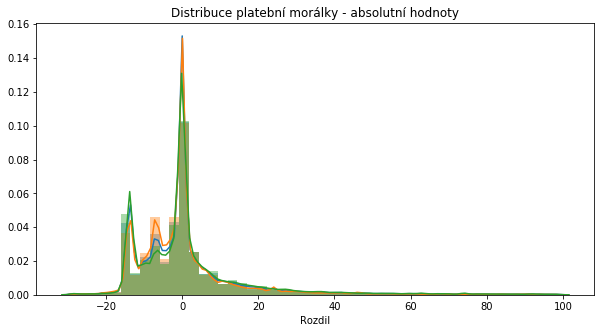

In [9]:
plt.figure(figsize=(10,5))
plt.title("Distribuce platební morálky - absolutní hodnoty")
sns.distplot(data['Rozdil'])
sns.distplot(data_par['Rozdil'])
sns.distplot(data_nepar['Rozdil'])

In [12]:
#data["D_Splatnosti"] = [dt.datetime.strptime(d, "%Y-%m-%d") for d in data["Datum_Splatnosti"]]

In [14]:
#data["D_Vystaveni"] = [dt.datetime.strptime(d, "%Y-%m-%d") for d in data["Datum_Vystaveni"]]

In [15]:
print(data.describe())

                 Id    Country      Nace_Kod        Rozdil     Splatnost  \
count  1.896068e+06  1896068.0  1.896068e+06  1.896068e+06  1.896068e+06   
mean   2.102085e+05        2.0  5.200441e+05  3.973803e-01  1.446700e+01   
std    1.150332e+05        0.0  1.965752e+05  1.538090e+01  1.408751e+01   
min    6.000000e+00        2.0  1.000000e+04 -2.900000e+01 -3.530000e+02   
25%    1.055540e+05        2.0  4.610000e+05 -8.000000e+00  7.000000e+00   
50%    2.673880e+05        2.0  4.791100e+05 -1.000000e+00  1.400000e+01   
75%    3.008910e+05        2.0  6.310000e+05  3.000000e+00  1.400000e+01   
max    4.044850e+05        2.0  9.820000e+05  9.900000e+01  5.880000e+02   

       SubscriptionType       IsTrial      Parovani  
count      1.896068e+06  1.896068e+06  1.896068e+06  
mean       1.702221e+00  8.252763e-02  4.970254e-01  
std        7.734549e-01  2.751670e-01  4.999913e-01  
min        0.000000e+00  0.000000e+00  0.000000e+00  
25%        1.000000e+00  0.000000e+00  0.0000

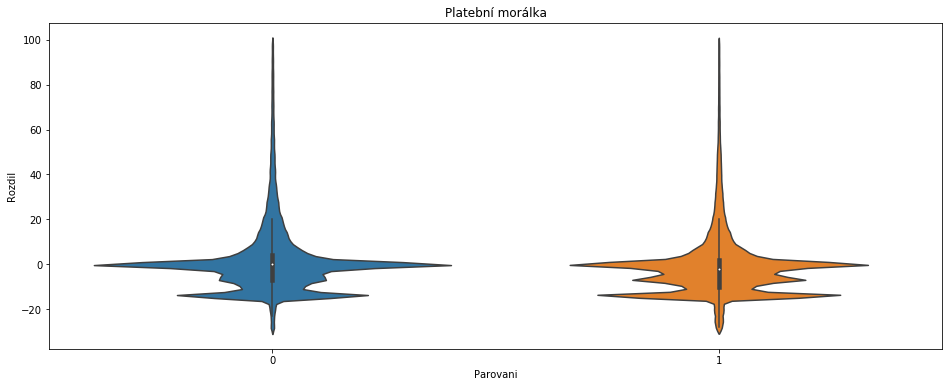

In [16]:
plt.figure(figsize=(16,6))
plt.title("Platební morálka")
sns.violinplot(x=data["Parovani"], y=data["Rozdil"])

In [17]:
#data = data.drop(data[(data['Diff'] > 365)].index)
#data = data.drop(data[(data['Diff'] < -365)].index)

In [18]:
#print(data.describe())

In [1]:
g = data.groupby(data["Datum_Vystaveni"].dt.strftime('%Y-%m'))['Rozdil'].mean()
#g_par = data_par.groupby(data_par["Datum_Vystaveni"].dt.strftime('%Y-%m'))['Rozdil'].mean()
#g_nepar = data_nepar.groupby(data_nepar["Datum_Vystaveni"].dt.strftime('%Y-%m'))['Rozdil'].mean()

NameError: name 'data' is not defined

In [9]:
print(g)
print(g.shape)

Datum_Vystaveni
2011-01     0.000000
2011-02     0.000000
2011-03     0.000000
2011-04    15.200000
2011-05    -6.750000
             ...    
2017-04    -0.143519
2017-05     4.775811
2017-06     1.157948
2017-07     0.841433
2017-08     2.657161
Name: Rozdil, Length: 80, dtype: float64
(80,)


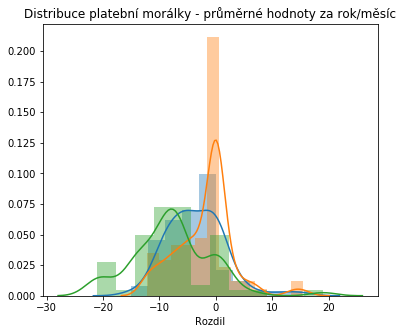

In [22]:
plt.figure(figsize=(6,5))
plt.title("Distribuce platební morálky - průměrné hodnoty za rok/měsíc")
sns.distplot(g)
sns.distplot(g_par)
sns.distplot(g_nepar)

# Vývoj platební morálky po měsících

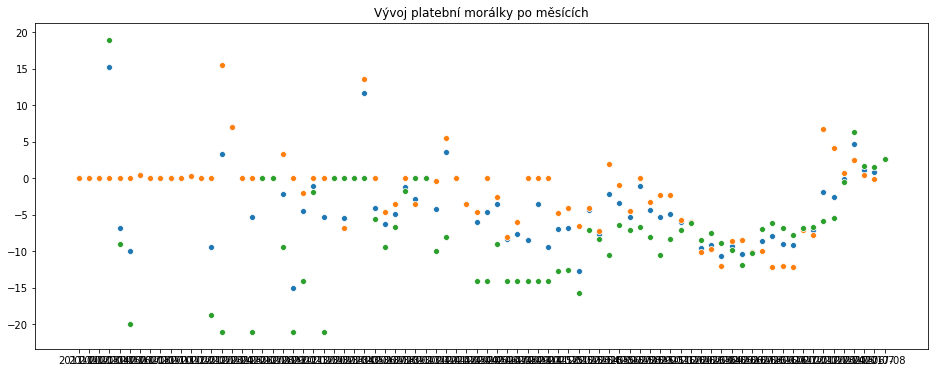

In [23]:
plt.figure(figsize=(16,6))
plt.title("Vývoj platební morálky po měsících")
sns.scatterplot(data=g)
sns.scatterplot(data=g_par)
sns.scatterplot(data=g_nepar)

In [23]:
#g = data.groupby(data['Vystaveni'].dt.strftime('%m'))['Rozdil'].mean()

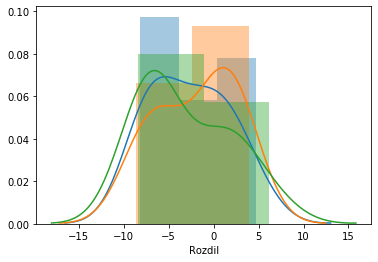

In [25]:
sns.distplot(data.groupby(data['Datum_Vystaveni'].dt.strftime('%m'))['Rozdil'].mean())
sns.distplot(data_par.groupby(data_par['Datum_Vystaveni'].dt.strftime('%m'))['Rozdil'].mean())
sns.distplot(data_nepar.groupby(data_nepar['Datum_Vystaveni'].dt.strftime('%m'))['Rozdil'].mean())

# Závislost podle měsíců v roce

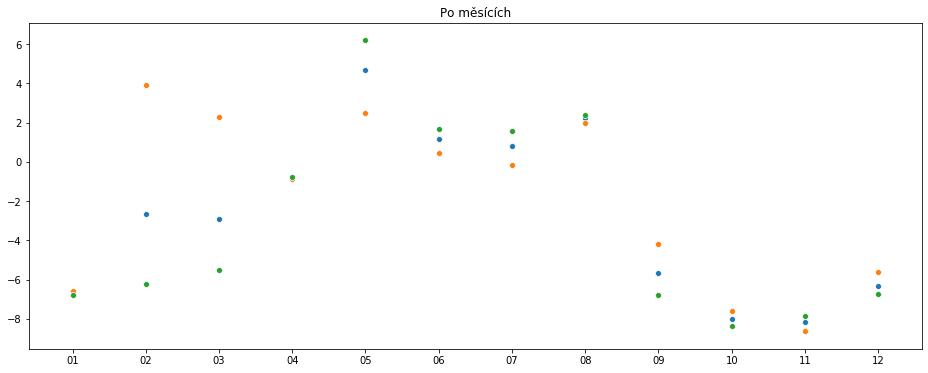

In [26]:
plt.figure(figsize=(16,6))
plt.title("Po měsících")
sns.scatterplot(data=(data.groupby(data['Datum_Vystaveni'].dt.strftime('%m'))['Rozdil'].mean()))
sns.scatterplot(data=(data_par.groupby(data_par['Datum_Vystaveni'].dt.strftime('%m'))['Rozdil'].mean()))
sns.scatterplot(data=(data_nepar.groupby(data_nepar['Datum_Vystaveni'].dt.strftime('%m'))['Rozdil'].mean()))

# Vývoj v jednotlivých letech

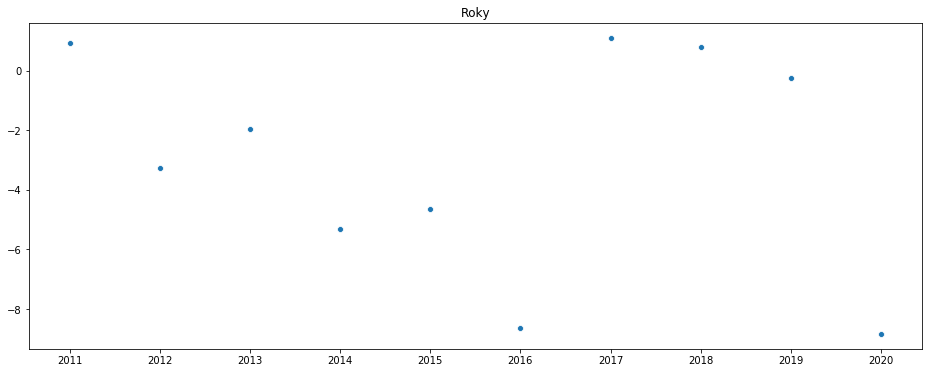

In [26]:
plt.figure(figsize=(16,6))
plt.title("Roky")
sns.scatterplot(data=(data.groupby(data['D_Vystaveni'].dt.strftime('%Y'))['Rozdil'].mean()))

# Závislost na dnech v týdnu

In [27]:
day = data.groupby(data['Datum_Vystaveni'].dt.strftime('%a'))['Rozdil'].mean()
print(day)

D_Vystaveni
Fri    1.084602
Mon   -0.004407
Sat    0.953387
Sun    0.566529
Thu    0.528471
Tue    0.019094
Wed    0.280730
Name: Rozdil, dtype: float64


In [28]:
print(day["Fri"])

1.0846021573668367


In [29]:
day_sorted = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

#= list(sorted(day.index, key=m.index))
val = list()
for d in range(len(day_sorted)):
    val.append(day[day_sorted[d]])

d = {"day":day_sorted}
df = pd.DataFrame(d)
val = list(val)
df['mean'] = val
df.set_index("day", inplace=True)

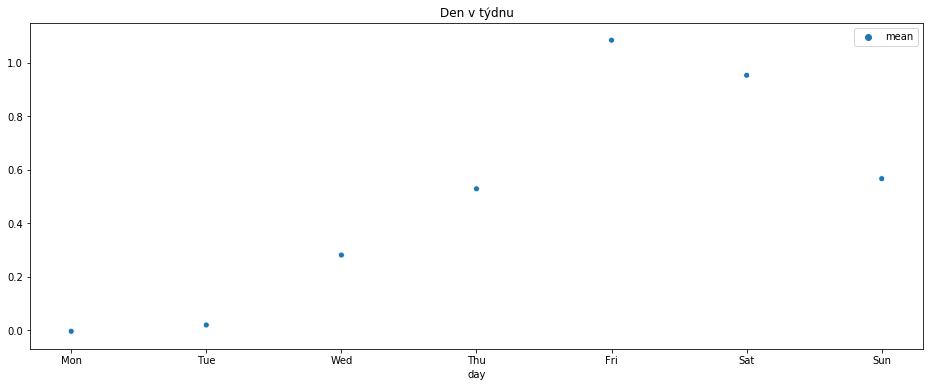

In [30]:
plt.figure(figsize=(16,6))
plt.title("Den v týdnu")
sns.scatterplot(data=(df))

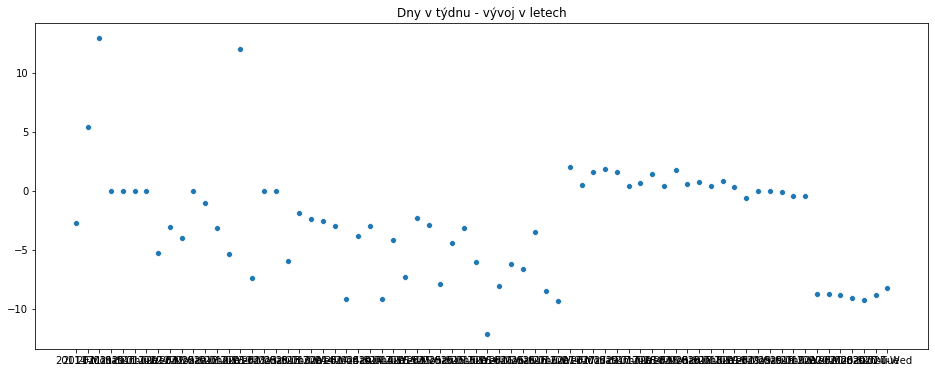

In [31]:
plt.figure(figsize=(16,6))
plt.title("Dny v týdnu - vývoj v letech")
sns.scatterplot(data=(data.groupby(data['Datum_Vystaveni'].dt.strftime('%Y-%a'))['Rozdil'].mean()))

In [32]:
#output = pd.DataFrame(g)

In [33]:
#g.to_csv("D:\output.csv", sep=",")